# Monte Carlo Simulation Example with NumPy
Based on a problem defined by Anthony Sun (http://www.geocities.com/WallStreet/9245/vba12.htm used originally with permission.  The link is no longer live, but I include it for completeness.

A firm is considering producing and selling a new product under a pure/perfect competition market and the firm wants to know the probability distribution for the profit associated with this product.  The total profit is given by the equation:

$TP=(Q \times P)-(Q \times V+F)$

where $TP$ is the total profit, $Q$ is the quantity sold, $P$ is the selling price, $V$ is the variable cost, and $F$ is the fixed cost.  Since the firm is *predicting* what will happen if they produce the product, some of the profit components are uncertain.  In particular, $Q$, $P$, and $V$ are estimated to be *random variables* with the following distributions:

  * $Q$: uniform(8000, 12000)
  * $P$: normal(10, 3)
  * $V$: normal(7, 2)

$F$ is fixed at 5000.

The goal is to use Monte Carlo simulation to estimate various descriptive statistics about the total profit associated with the product (if the project were undertaken) and to ultimately proivde information to aid a decision-maker in deciding whether or not to pursue the project.

## Some Initial Setup

In [1]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt

#
# Define a function to plot a histogram of the observations
#
def hplot(tps, NumBins = 20) :
    # create histogram
    plt.hist(tps, bins=NumBins)
    # yellow line at the sample mean
    plt.axvline(AvgTP, color='y', linestyle='solid', linewidth=4)
    # red line at 0
    plt.axvline(0, color='r', linestyle='solid', linewidth=2)
    plt.show()

## Standard Loop-based Version

In [2]:
#
# Define a function to sample an observation (one replication)
#
def sample() :
    q = random.uniform(8000,12000)
    v = random.normalvariate(7,2)
    p = random.normalvariate(10,3)
    return (q*(p-v)-5000)

Replications = 500000
tps = []

# Loop
for i in range (Replications) :
    # sample the value
    tp = sample()
    # Accumulate for the average
    tps.append(tp);
# compute average
AvgTP = float(sum(tps))/Replications


Based on 500,000 replications:
	Average : 25,023.53
	Range   : (-144,642.24, 219,745.94)
	pr(<0)  : 0.2447


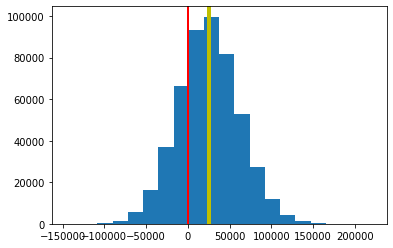

In [3]:
# show solution
print ("\nBased on {:,d} replications:".format(Replications))
print ("\tAverage : {:,.2f}".format(AvgTP))
print ("\tRange   : ({:,.2f}, {:,.2f})".format(min(tps), max(tps)))
print ("\tpr(<0)  : {:.4f}".format(float(len([v for v in tps if v < 0]))/Replications))
hplot(tps)

## Simple Vector Version Using NumPy

In [4]:
# Simple vector version using NumPy
# Specify the number of observations/replications to perform
obs = 500000
# generate the input vectors
price = np.random.normal(10, 3, obs)
marginal = np.random.normal(7, 2, obs)
demand = np.random.uniform(8000, 12000, obs)
# compute the expected profit for each replication (using vector operations)
tp = demand * (price - marginal) - 5000
# compute average
AvgTP = float(sum(tp))/obs

          Expected profit: $ 24,911.21
                Std. Dev.: $ 36,450.02
          25th Percentile: $    564.22
          75th Percentile: $ 48,872.78
     Prob. of losing money: 0.245
Prob. of making > $100,000: 0.022


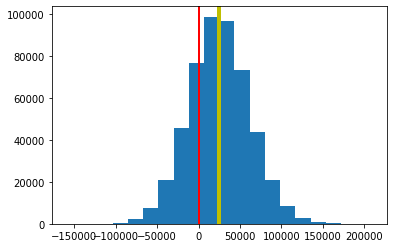

In [5]:
# basic display of results
# Descriptive Statistics
print("          Expected profit: ${:10,.2f}".format(tp.mean()))
print("                Std. Dev.: ${:10,.2f}".format(tp.std()))
print("          25th Percentile: ${:10,.2f}".format(np.percentile(tp, 25)))
print("          75th Percentile: ${:10,.2f}".format(np.percentile(tp, 75)))
print("     Prob. of losing money: {:.3f}".format(np.sum(tp < 0)/obs))
print("Prob. of making > $100,000: {:.3f}".format(np.sum(tp > 100000)/obs))
# histogram
hplot(tp)

## Aggregate the Individual Arrays into a Single Experiment

This will give you a single matrix with rows representing replications and columns presenting the random variable observations.

In [6]:
# Create 4 single-column arrays from the individual arrays
p = price.reshape(obs,1)
m = marginal.reshape(obs,1)
d = demand.reshape(obs,1)
pr = tp.reshape(obs,1)
p.shape, m.shape, d.shape, pr.shape

((500000, 1), (500000, 1), (500000, 1), (500000, 1))

In [7]:
# Create 4 single-column arrays - A different way to do the reshape operation
#p = price[:,np.newaxis]
#m = marginal[:, np.newaxis]
#d = demand[:, np.newaxis]
#pr = tp[:, np.newaxis]
#p.shape, m.shape, d.shape, pr.shape

In [8]:
# Concatenate the four into a matrix -- each row represents a replication
a = np.concatenate([p, m, d, pr], axis=1)
a.shape

(500000, 4)

In [9]:
# mean of each random variable
a.mean(axis=0)

array([9.99363562e+00, 7.00165417e+00, 1.00004556e+04, 2.49112106e+04])